In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from scipy import stats
sns.set(color_codes=True)
sns.set(font_scale=1)
df = pd.read_csv(r'~/Documents/MATLAB/Model_identifiability/HaptoSAADataTable.csv')
dfN = pd.read_csv(r'~/Documents/MATLAB/Model_identifiability/HaptoSAADataTableNeedle.csv')
dfM = pd.read_csv(r'~/Documents/MATLAB/Model_identifiability/MeansHaptoOnlyDataTable.csv')
# dfDev = pd.read_csv(r'~/Documents/MATLAB/Model_identifiability/DevsHaptoSAADataTable.csv')
colors = [(0.9921568627450981, 0.7490196078431373, 0.43529411764705883), (1.0, 0.4980392156862745, 0.0), (0.792156862745098, 0.6980392156862745, 0.8392156862745098), (0.41568627450980394, 0.23921568627450981, 0.6039215686274509), (1.0, 1.0, 0.6), (0.6941176470588235, 0.34901960784313724, 0.1568627450980392)]
#df2 = pd.read_csv(r'/home/anon/Documents/MATLAB/Model_identifiability/FitParamsContactHapto.csv')
#colors = ["lightsteelblue", "royalblue","darkblue","palegreen","mediumseagreen","darkgreen","lightcoral","red","darkred"]
dfMN = pd.read_csv(r'~/Documents/MATLAB/Model_identifiability/MeansHaptoOnlyDataTableNeedle.csv')
df

,Type,ID,k,K,delta,b,I0,r,PS,P0,maxViral,TimeMax,cumViral
0,Contact SAT1 SAA,2,0.176394,7.438495,2.163732,0.336671,1.852762,3.103724,0.006781,0.007535,7.363252,3.95,28.354702
1,Contact SAT1 SAA,2,0.147139,6.324932,1.912699,0.298288,2.003750,3.554056,0.008068,0.008811,6.301295,3.69,32.049702
2,Contact SAT1 SAA,2,0.166076,7.290765,1.796460,0.309797,1.720369,3.250199,0.009113,0.008285,7.246288,3.94,31.594702
3,Contact SAT1 SAA,2,0.137801,6.359574,1.683345,0.366820,1.999450,3.374271,0.006600,0.007333,6.319872,3.79,26.547109
4,Contact SAT1 SAA,2,0.165130,6.567669,1.469424,0.340329,1.778479,3.211185,0.009520,0.008654,6.530696,3.97,29.219559
...,...,...,...,...,...,...,...,...,...,...,...,...,...
219995,Contact SAT3 Hapto,17,0.040000,6.260108,1.678108,0.469721,2.482763,1.907389,0.016743,0.015221,5.953411,4.99,19.925800
219996,Contact SAT3 Hapto,17,0.040000,7.351376,1.940377,0.388800,2.549251,1.959059,0.017347,0.015770,7.007409,4.96,23.616418
219997,Contact SAT3 Hapto,17,0.050346,8.625142,1.990011,0.346598,2.821989,1.856666,0.017096,0.018995,8.105388,5.06,26.137857
219998,Contact SAT3 Hapto,17,0.079628,5.139961,1.900194,0.506949,1.817456,2.029475,0.019131,0.021257,4.981674,4.70,18.749085


In [2]:
# dfSAT1SAA = dfM.loc[dfM['Type'] == 'Contact SAT1 SAA']
# dfSAT2SAA = dfM.loc[dfM['Type'] == 'Contact SAT2 SAA']
# dfSAT3SAA = dfM.loc[dfM['Type'] == 'Contact SAT3 SAA']
dfSAT1HaptoN = dfN.loc[dfN['Type'] == 'Needle SAT1 Hapto']
dfSAT2HaptoN = dfN.loc[dfN['Type'] == 'Needle SAT2 Hapto']
dfSAT3HaptoN = dfN.loc[dfN['Type'] == 'Needle SAT3 Hapto']

# dfSAT1SAADev = dfDev.loc[dfDev['Type'] == 'SAT1 SAA']
# dfSAT2SAADev = dfDev.loc[dfDev['Type'] == 'SAT2 SAA']
# dfSAT3SAADev = dfDev.loc[dfDev['Type'] == 'SAT3 SAA']
# dfSAT1HaptoDev = dfDev.loc[dfDev['Type'] == 'SAT1 Hapto']
# dfSAT2HaptoDev = dfDev.loc[dfDev['Type'] == 'SAT2 Hapto']
# dfSAT3HaptoDev = dfDev.loc[dfDev['Type'] == 'SAT3 Hapto']
dfM[['maxViral']].idxmax()
#dfM = dfM.drop(21703)
#dfM = dfM.drop(76428)
#dfM = dfM.drop(77791)
#dfM = dfM.drop(72127)
#df[['maxViral']].idxmax()
#df = df.drop(152107)
#df = df.drop(104421)
#df = df.drop(190382)
# df = df.drop(164819
#dfM = dfM.drop(32107)
#dfM = dfM.drop(24421)
#dfM = dfM.drop(50382)
#dfM = dfM.drop(44819)
#dfM = dfM.drop(12107)
#dfM = dfM.drop(20382)
dfM = dfM.drop(21703)


In [3]:
#dfM[['maxViral']].idxmax()
#dfM = dfM.drop(21703)

# a = dfM.corr(method='spearman') 
# fig, ax = plt.subplots(figsize=(11,11)) 
# matrix = np.triu(a)
# A = sns.heatmap(a,annot=True,mask=matrix)
# plt.title('Correlation across serotype sample mean parameter values \n contact infected hosts, generated data-sets')
# plt.show()

a = dfMSAT3.corr(method='spearman') 
fig, ax = plt.subplots(figsize=(11,11)) 
matrix = np.triu(a)
A = sns.heatmap(a,annot=True,mask=matrix)
plt.title('Correlation across serotype sample  parameter values \n contact infected hosts, generated data-sets')
plt.show()
# threshold for statistical significance is |rho| ~= .6 


NameError: name 'dfMSAT3' is not defined

In [ ]:
#del dfM['PS']
sns.set_context("paper", rc={"axes.labelsize":36})
h = sns.pairplot(dfM, hue = 'ID',palette = ["blue", "green", "red"],corner=True)
h._legend.remove()
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [ ]:
dfMSAT1 = dfM.loc[dfM['Type'] == 'Contact SAT1 Hapto']
dfMSAT2 = dfM.loc[dfM['Type'] == 'Contact SAT2 Hapto']
dfMSAT3 = dfM.loc[dfM['Type'] == 'Contact SAT3 Hapto']

In [4]:
dfMViral = dfM[["ID","k","I0","b","delta","r","P0","TimeMax","cumViral","maxViral"]]
dfMViral.columns =['ID', 'k', '$I_0$','b','$\delta$','r','$P_0$','Time max', 'Cum. viral', "Max viral"]

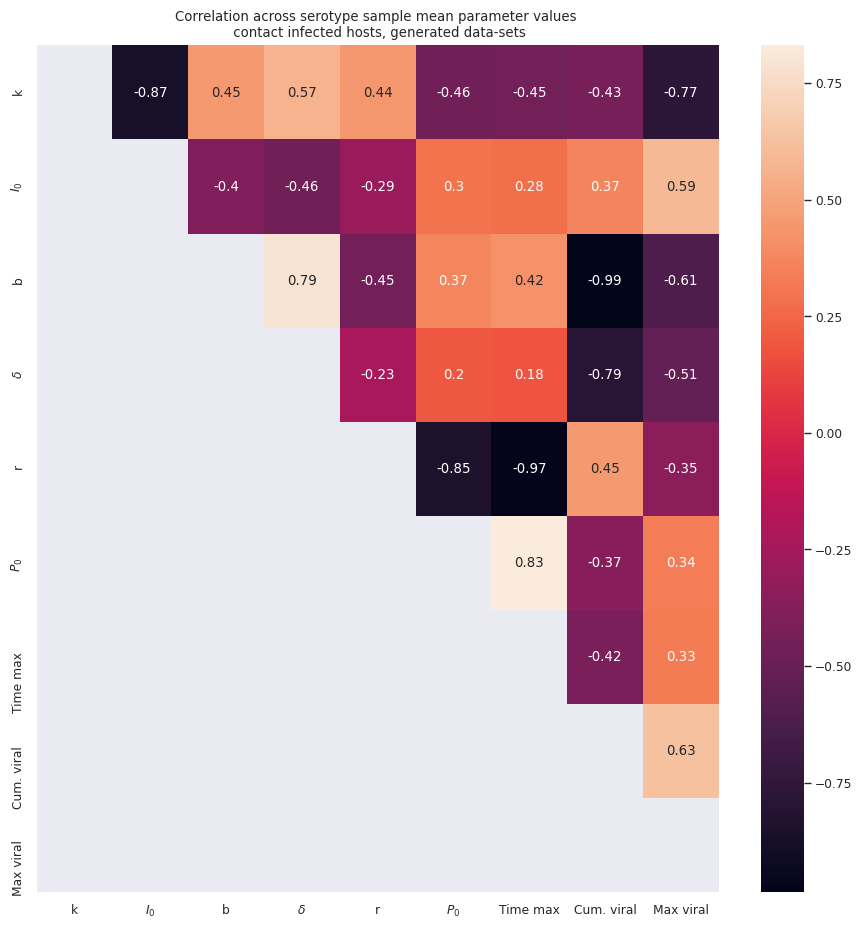

In [13]:
a = dfMViral.corr(method='spearman') 
fig, ax = plt.subplots(figsize=(11,11)) 
matrix = np.tril(a)
A = sns.heatmap(a,annot=True,mask=matrix)
plt.title('Correlation across serotype sample mean parameter values \n contact infected hosts, generated data-sets')
plt.show()

In [18]:
from scipy.stats import spearmanr
bbox = dict(boxstyle ="round", fc ="0.8")
def corrfunc(x, y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = spearmanr(x, y)
    ax = ax or plt.gca()
    ax.annotate(f'ρ = {r:.2f}', xy=(.1, .9), xycoords=ax.transAxes,bbox=bbox,annot_kws={'size': 25})

sns.set_context("paper", rc={"axes.labelsize":32})
h = sns.pairplot(dfMViral, hue = 'ID',palette = ["blue", "green", "red"],corner=True)
h._legend.remove()
plt.xticks(rotation=45)
plt.yticks(rotation=45)
h.map_lower(corrfunc)
plt.show()

AttributeError: 'Annotation' object has no property 'annot_kws'

In [ ]:

a = dfSAT1Hapto.corr(method='spearman') 
fig, ax = plt.subplots(figsize=(11,11)) 
matrix = np.triu(a)
A = sns.heatmap(a,annot=True,mask=matrix)
plt.title('Correlation between SAT1 parameter values \n contact infected hosts, generated data-sets')
# threshold for statistical significance is |rho| ~= .6 

In [ ]:
# a = df.corr(method='spearman') 
# fig, ax = plt.subplots(figsize=(11,11)) 
# matrix = np.triu(a)
# A = sns.heatmap(a,annot=True,mask=matrix)
# plt.title('Correlation between individual host parameter values \n contact infected hosts, generated datasets')
# # threshold for statistical significance is |rho| ~= .6 
#del dfSAT1Hapto['PS']
sns.set_context("paper", rc={"axes.labelsize":36})
h = sns.pairplot(dfSAT1Hapto, hue = 'ID',palette = ["darkblue", "royalblue", "dodgerblue","lightsteelblue"],corner=True)
h._legend.remove()
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [ ]:
del dfSAT2Hapto['ID']
a = dfSAT2Hapto.corr(method='spearman') 
fig, ax = plt.subplots(figsize=(11,11)) 
matrix = np.triu(a)
A = sns.heatmap(a,annot=True,mask=matrix)
plt.title('Correlation between SAT2 parameter values \n contact infected hosts, generated data-sets')
# threshold for statistical significance is |rho| ~= .6 

 Relationships Between Means

In [ ]:
sns.set_context("paper", rc={"axes.labelsize":36})
h = sns.pairplot(dfSAT2Hapto, hue = 'ID',palette = ["darkseagreen","forestgreen","springgreen","mediumaquamarine"],corner=True)
h._legend.remove()
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

Relationship Between Std. Devs.

In [ ]:


del dfSAT3Hapto['ID']
a = dfSAT3Hapto.corr(method='spearman') 
fig, ax = plt.subplots(figsize=(11,11)) 
matrix = np.triu(a)
A = sns.heatmap(a,annot=True,mask=matrix)
plt.title('Correlation between SAT3 parameter values \n contact infected hosts, generated data-sets')
# threshold for statistical significance is |rho| ~= .6 

In [ ]:
#dfSAT3Hapto[['maxViral']].idxmax()
#dfSAT3Hapto = dfSAT3Hapto.drop(211703)
sns.set_context("paper", rc={"axes.labelsize":36})
h = sns.pairplot(dfSAT3Hapto, hue = 'ID',palette = ["lightcoral","maroon","red"],corner=True)
h._legend.remove()
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

Relationships Between Individual Hosts

In [ ]:
#del dfMN['ID']
a = dfMN.corr(method='spearman') 
fig, ax = plt.subplots(figsize=(11,11)) 
matrix = np.triu(a)
A = sns.heatmap(a,annot=True,mask=matrix)
plt.title('Correlation across serotype sample mean parameter values \n needle infected hosts, generated data-sets')
plt.show()

In [ ]:
#del dfMN['PS']
#dfMN[['maxViral']].idxmax()
#dfMN = dfMN.drop(12107)
dfMN = dfMN.drop(20382)
sns.set_context("paper", rc={"axes.labelsize":36})
h = sns.pairplot(dfMN, hue = 'ID',palette = ["orange", "purple", "brown"],corner=True)
h._legend.remove()
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [ ]:
# del dfSAT1HaptoN['ID']
# del dfSAT1HaptoN['PS']
a = dfSAT1HaptoN.corr(method='spearman') 
fig, ax = plt.subplots(figsize=(11,11)) 
matrix = np.triu(a)
A = sns.heatmap(a,annot=True,mask=matrix)
plt.title('Correlation between SAT1 parameter values \n needle infected hosts, generated data-sets')
# threshold for statistical significance is |rho| ~= .6 

In [ ]:

del dfSAT1HaptoN['PS']
sns.set_context("paper", rc={"axes.labelsize":36})
h = sns.pairplot(dfSAT1HaptoN, hue = 'ID',palette = ["darkorange", "orange", "orangered","darksalmon"],corner=True)
h._legend.remove()
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [ ]:
 del dfSAT2HaptoN['ID']
# del dfSAT1HaptoN['PS']
a = dfSAT2HaptoN.corr(method='spearman') 
fig, ax = plt.subplots(figsize=(11,11)) 
matrix = np.triu(a)
A = sns.heatmap(a,annot=True,mask=matrix)
plt.title('Correlation between SAT2 parameter values \n needle infected hosts, generated data-sets')
# threshold for statistical significance is |rho| ~= .6 

In [ ]:

sns.set_context("paper", rc={"axes.labelsize":36})
h = sns.pairplot(dfSAT2HaptoN, hue = 'ID',palette = ["indigo", "purple", "darkorchid","plum"],corner=True)
h._legend.remove()
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [ ]:
#del dfSAT3HaptoN['ID']
# del dfSAT1HaptoN['PS']
a = dfSAT3HaptoN.corr(method='spearman') 
fig, ax = plt.subplots(figsize=(11,11)) 
matrix = np.triu(a)
A = sns.heatmap(a,annot=True,mask=matrix)
plt.title('Correlation between SAT3 parameter values \n needle infected hosts, generated data-sets')
# threshold for statistical significance is |rho| ~= .6 

In [ ]:
#del dfSAT3HaptoN['PS']
dfSAT3HaptoN[['maxViral']].idxmax()
dfSAT3HaptoN = dfSAT3HaptoN.drop(190382)
sns.set_context("paper", rc={"axes.labelsize":36})
h = sns.pairplot(dfSAT3HaptoN, hue = 'ID',palette = ["chocolate", "brown", "sandybrown","peru"],corner=True)
h._legend.remove()
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [ ]:
h = sns.boxplot(data=df, x="ID", y="delta",hue="Type",palette=colors,
                order=[7,10,11,13,8,20,28,32,26,27,34,35])
#plt.xlim([0,1.05*max(df["lam"])])
#h.set_axis_labels('x', 'y', fontsize=16)

# or set labels via the axes objects
h.set_xlabel( r"Host ID" , size = 16 ) 
h.set_ylabel( r"range" , size = 16 ) 
h.set_title( r"Adaptive Response Clearence Rate" , size = 16 ) 
#h.ax_joint.set_xlabel('$Lambda$')
#h.ax_joint.set_ylabel('k')
hh = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
hh.remove()
plt.figure(figsize=(11,22))
plt.show()

h = sns.boxplot(data=dfM, x="ID", y="delta",hue="Type",palette=["blue","green","red"],
                )
#plt.xlim([0,1.05*max(df["lam"])])
#h.set_axis_labels('x', 'y', fontsize=16)

# or set labels via the axes objects
h.set_xlabel( r"Serotype" , size = 16 ) 
h.set_ylabel( r"range" , size = 16 ) 
h.set_title( r"Mean Adaptive Response Clearence Rate" , size = 16 ) 
#h.ax_joint.set_xlabel('$Lambda$')
#h.ax_joint.set_ylabel('k')
hh =plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
hh.remove()
plt.figure(figsize=(11,22))
plt.show()

h = sns.boxplot(data=dfDev, x="ID", y="delta",hue="Type",palette=["blue","green","red"],
                )
#plt.xlim([0,1.05*max(df["lam"])])
#h.set_axis_labels('x', 'y', fontsize=16)

# or set labels via the axes objects
h.set_xlabel( r"Serotype" , size = 16 ) 
h.set_ylabel( r"range" , size = 16 ) 
h.set_title( r"Std. Dev. Adatptive Response Clearence Rate" , size = 16 ) 
#h.ax_joint.set_xlabel('$Lambda$')
#h.ax_joint.set_ylabel('k')
hh = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
hh.remove()
plt.figure(figsize=(11,22))
plt.show()

In [ ]:
S1, S2, S3 = dfSAT1SAA['delta'], dfSAT2SAA['delta'],dfSAT3SAA['delta']
H1, H2, H3 = dfSAT1Hapto['delta'], dfSAT2Hapto['delta'],dfSAT3Hapto['delta']

print('########################################################################')
print('\nClearence of Pathogen by Adaptive Response\n')
print('difference between means across SATs, same measure (SAA)')
print('SAT1-SAT2')
cm = sms.CompareMeans(sms.DescrStatsW(S1), sms.DescrStatsW(S2))
print(cm.tconfint_diff(usevar='unequal'))
print('SAT1-SAT3')
cm = sms.CompareMeans(sms.DescrStatsW(S1), sms.DescrStatsW(S3))
print(cm.tconfint_diff(usevar='unequal'))
print('SAT2-SAT3')
cm = sms.CompareMeans(sms.DescrStatsW(S2), sms.DescrStatsW(S3))
print(cm.tconfint_diff(usevar='unequal'))
print('\ndifference across SATs, same measure (Hapto)')
print('SAT1-SAT2')
cm = sms.CompareMeans(sms.DescrStatsW(H1), sms.DescrStatsW(H2))
print(cm.tconfint_diff(usevar='unequal'))
print('SAT1-SAT3')
cm = sms.CompareMeans(sms.DescrStatsW(H1), sms.DescrStatsW(H3))
print(cm.tconfint_diff(usevar='unequal'))
print('SAT2-SAT3')
cm = sms.CompareMeans(sms.DescrStatsW(H2), sms.DescrStatsW(H3))
print(cm.tconfint_diff(usevar='unequal'))

print('\n\ndifference between means across measure, same SATs')
print('SAA-Hapto')
cm = sms.CompareMeans(sms.DescrStatsW(S1), sms.DescrStatsW(H1))
print(cm.tconfint_diff(usevar='unequal'))
cm = sms.CompareMeans(sms.DescrStatsW(S2), sms.DescrStatsW(H2))
print(cm.tconfint_diff(usevar='unequal'))
cm = sms.CompareMeans(sms.DescrStatsW(S3), sms.DescrStatsW(H3))
print(cm.tconfint_diff(usevar='unequal'))

S1, S2, S3 = dfSAT1SAADev['delta'], dfSAT2SAADev['delta'],dfSAT3SAADev['delta']
H1, H2, H3 = dfSAT1HaptoDev['delta'], dfSAT2HaptoDev['delta'],dfSAT3HaptoDev['delta']

print('\n########################################################################')
print('difference between std. dev. across SATs, same measure (SAA)')
print('SAT1-SAT2')
cm = sms.CompareMeans(sms.DescrStatsW(S1), sms.DescrStatsW(S2))
print(cm.tconfint_diff(usevar='unequal'))
print('SAT1-SAT3')
cm = sms.CompareMeans(sms.DescrStatsW(S1), sms.DescrStatsW(S3))
print(cm.tconfint_diff(usevar='unequal'))
print('SAT2-SAT3')
cm = sms.CompareMeans(sms.DescrStatsW(S2), sms.DescrStatsW(S3))
print(cm.tconfint_diff(usevar='unequal'))
print('\ndifference across SATs, same measure (Hapto)')
print('SAT1-SAT2')
cm = sms.CompareMeans(sms.DescrStatsW(H1), sms.DescrStatsW(H2))
print(cm.tconfint_diff(usevar='unequal'))
print('SAT1-SAT3')
cm = sms.CompareMeans(sms.DescrStatsW(H1), sms.DescrStatsW(H3))
print(cm.tconfint_diff(usevar='unequal'))
print('SAT2-SAT3')
cm = sms.CompareMeans(sms.DescrStatsW(H2), sms.DescrStatsW(H3))
print(cm.tconfint_diff(usevar='unequal'))

print('\n\ndifference between std. dev. across measure, same SATs')
print('SAA-Hapto')
cm = sms.CompareMeans(sms.DescrStatsW(S1), sms.DescrStatsW(H1))
print(cm.tconfint_diff(usevar='unequal'))
cm = sms.CompareMeans(sms.DescrStatsW(S2), sms.DescrStatsW(H2))
print(cm.tconfint_diff(usevar='unequal'))
cm = sms.CompareMeans(sms.DescrStatsW(S3), sms.DescrStatsW(H3))
print(cm.tconfint_diff(usevar='unequal'))

In [ ]:
h = sns.boxplot(data=df, x="ID", y="b",hue="Type",palette=colors,
                order=[7,10,11,13,8,20,28,32,26,27,34,35])
#plt.xlim([0,1.05*max(df["lam"])])
#h.set_axis_labels('x', 'y', fontsize=16)

# or set labels via the axes objects
h.set_xlabel( r"Host ID" , size = 16 ) 
h.set_ylabel( r"range" , size = 16 )
h.set_title( r"Activation Rate of Adaptive Response" , size = 16 ) 
#h.ax_joint.set_xlabel('$Lambda$')
#h.ax_joint.set_ylabel('k')
hh = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
hh.remove()
plt.figure(figsize=(11,22))
plt.show()

h = sns.boxplot(data=dfM, x="ID", y="b",hue="Type",palette=["blue","green","red"],
                )
#plt.xlim([0,1.05*max(df["lam"])])
#h.set_axis_labels('x', 'y', fontsize=16)

# or set labels via the axes objects
h.set_xlabel( r"Serotype" , size = 16 ) 
h.set_ylabel( r"range" , size = 16 )
h.set_title( r"Mean Activation Rate of Adaptive Response" , size = 16 ) 
#h.ax_joint.set_xlabel('$Lambda$')
#h.ax_joint.set_ylabel('k')
hh = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
hh.remove()
plt.figure(figsize=(11,22))
plt.show()

h = sns.boxplot(data=dfDev, x="ID", y="b",hue="Type",palette="Paired",
                )
#plt.xlim([0,1.05*max(df["lam"])])
#h.set_axis_labels('x', 'y', fontsize=16)

# or set labels via the axes objects
h.set_xlabel( r"Serotype" , size = 16 ) 
h.set_ylabel( r"range" , size = 16 )
h.set_title( r"Std. Dev. Activation Rate of Adaptive Response" , size = 16 ) 
#h.ax_joint.set_xlabel('$Lambda$')
#h.ax_joint.set_ylabel('k')
hh = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
hh.remove()
plt.figure(figsize=(11,22))
plt.show()

In [ ]:
S1, S2, S3 = dfSAT1SAA['b'], dfSAT2SAA['b'],dfSAT3SAA['b']
H1, H2, H3 = dfSAT1Hapto['b'], dfSAT2Hapto['b'],dfSAT3Hapto['b']

print('########################################################################')
print('\nAdaptive Response Activation Rate\n')
print('difference between means across SATs, same measure (SAA)')
print('SAT1-SAT2')
cm = sms.CompareMeans(sms.DescrStatsW(S1), sms.DescrStatsW(S2))
print(cm.tconfint_diff(usevar='unequal'))
print('SAT1-SAT3')
cm = sms.CompareMeans(sms.DescrStatsW(S1), sms.DescrStatsW(S3))
print(cm.tconfint_diff(usevar='unequal'))
print('SAT2-SAT3')
cm = sms.CompareMeans(sms.DescrStatsW(S2), sms.DescrStatsW(S3))
print(cm.tconfint_diff(usevar='unequal'))
print('\ndifference across SATs, same measure (Hapto)')
print('SAT1-SAT2')
cm = sms.CompareMeans(sms.DescrStatsW(H1), sms.DescrStatsW(H2))
print(cm.tconfint_diff(usevar='unequal'))
print('SAT1-SAT3')
cm = sms.CompareMeans(sms.DescrStatsW(H1), sms.DescrStatsW(H3))
print(cm.tconfint_diff(usevar='unequal'))
print('SAT2-SAT3')
cm = sms.CompareMeans(sms.DescrStatsW(H2), sms.DescrStatsW(H3))
print(cm.tconfint_diff(usevar='unequal'))

print('\n\ndifference between means across measure, same SATs')
print('SAA-Hapto')
cm = sms.CompareMeans(sms.DescrStatsW(S1), sms.DescrStatsW(H1))
print(cm.tconfint_diff(usevar='unequal'))
cm = sms.CompareMeans(sms.DescrStatsW(S2), sms.DescrStatsW(H2))
print(cm.tconfint_diff(usevar='unequal'))
cm = sms.CompareMeans(sms.DescrStatsW(S3), sms.DescrStatsW(H3))
print(cm.tconfint_diff(usevar='unequal'))

S1, S2, S3 = dfSAT1SAADev['b'], dfSAT2SAADev['b'],dfSAT3SAADev['b']
H1, H2, H3 = dfSAT1HaptoDev['b'], dfSAT2HaptoDev['b'],dfSAT3HaptoDev['b']

print('\n########################################################################')
print('difference between std. dev. across SATs, same measure (SAA)')
print('SAT1-SAT2')
cm = sms.CompareMeans(sms.DescrStatsW(S1), sms.DescrStatsW(S2))
print(cm.tconfint_diff(usevar='unequal'))
print('SAT1-SAT3')
cm = sms.CompareMeans(sms.DescrStatsW(S1), sms.DescrStatsW(S3))
print(cm.tconfint_diff(usevar='unequal'))
print('SAT2-SAT3')
cm = sms.CompareMeans(sms.DescrStatsW(S2), sms.DescrStatsW(S3))
print(cm.tconfint_diff(usevar='unequal'))
print('\ndifference across SATs, same measure (Hapto)')
print('SAT1-SAT2')
cm = sms.CompareMeans(sms.DescrStatsW(H1), sms.DescrStatsW(H2))
print(cm.tconfint_diff(usevar='unequal'))
print('SAT1-SAT3')
cm = sms.CompareMeans(sms.DescrStatsW(H1), sms.DescrStatsW(H3))
print(cm.tconfint_diff(usevar='unequal'))
print('SAT2-SAT3')
cm = sms.CompareMeans(sms.DescrStatsW(H2), sms.DescrStatsW(H3))
print(cm.tconfint_diff(usevar='unequal'))

print('\n\ndifference between std. dev. across measure, same SATs')
print('SAA-Hapto')
cm = sms.CompareMeans(sms.DescrStatsW(S1), sms.DescrStatsW(H1))
print(cm.tconfint_diff(usevar='unequal'))
cm = sms.CompareMeans(sms.DescrStatsW(S2), sms.DescrStatsW(H2))
print(cm.tconfint_diff(usevar='unequal'))
cm = sms.CompareMeans(sms.DescrStatsW(S3), sms.DescrStatsW(H3))
print(cm.tconfint_diff(usevar='unequal'))

In [ ]:
h = sns.boxplot(data=df, x="ID", y="I0",hue="Type",palette=colors,
                order=[7,10,11,13,8,20,28,32,26,27,34,35])
#plt.xlim([0,1.05*max(df["lam"])])
#h.set_axis_labels('x', 'y', fontsize=16)

# or set labels via the axes objects
h.set_xlabel( r"Host ID" , size = 16 ) 
h.set_ylabel( r"range" , size = 16 )
h.set_title( r"Initial Measured Innate Response Level" , size = 16 ) 
#h.ax_joint.set_xlabel('$Lambda$')
#h.ax_joint.set_ylabel('k')
rr = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
rr.remove()
plt.figure(figsize=(11,22))
plt.show()

h = sns.boxplot(data=dfM, x="ID", y="I0",hue="Type",palette=["blue","green","red"],
               )
#plt.xlim([0,1.05*max(df["lam"])])
#h.set_axis_labels('x', 'y', fontsize=16)

# or set labels via the axes objects
h.set_xlabel( r"Serotype" , size = 16 ) 
h.set_ylabel( r"range" , size = 16 )
h.set_title( r"Mean Initial Measured Innate Response Level" , size = 16 ) 
#h.ax_joint.set_xlabel('$Lambda$')
#h.ax_joint.set_ylabel('k')
rr = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
rr.remove()
plt.figure(figsize=(11,22))
plt.show()

h = sns.boxplot(data=dfDev, x="ID", y="I0",hue="Type",palette="Paired",
               )
#plt.xlim([0,1.05*max(df["lam"])])
#h.set_axis_labels('x', 'y', fontsize=16)

# or set labels via the axes objects
h.set_xlabel( r"Serotype" , size = 16 ) 
h.set_ylabel( r"range" , size = 16 )
h.set_title( r"Std. Dev. Measured Innate Response Level" , size = 16 ) 
#h.ax_joint.set_xlabel('$Lambda$')
#h.ax_joint.set_ylabel('k')
rr = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
rr.remove()
plt.figure(figsize=(11,22))
plt.show()

In [ ]:
S1, S2, S3 = dfSAT1SAA['I0'], dfSAT2SAA['I0'],dfSAT3SAA['I0']
H1, H2, H3 = dfSAT1Hapto['I0'], dfSAT2Hapto['I0'],dfSAT3Hapto['I0']

print('########################################################################')
print('\nIntial Measured Innate Response Level\n')
print('difference between means across SATs, same measure (SAA)')
print('SAT1-SAT2')
cm = sms.CompareMeans(sms.DescrStatsW(S1), sms.DescrStatsW(S2))
print(cm.tconfint_diff(usevar='unequal'))
print('SAT1-SAT3')
cm = sms.CompareMeans(sms.DescrStatsW(S1), sms.DescrStatsW(S3))
print(cm.tconfint_diff(usevar='unequal'))
print('SAT2-SAT3')
cm = sms.CompareMeans(sms.DescrStatsW(S2), sms.DescrStatsW(S3))
print(cm.tconfint_diff(usevar='unequal'))
print('\ndifference across SATs, same measure (Hapto)')
print('SAT1-SAT2')
cm = sms.CompareMeans(sms.DescrStatsW(H1), sms.DescrStatsW(H2))
print(cm.tconfint_diff(usevar='unequal'))
print('SAT1-SAT3')
cm = sms.CompareMeans(sms.DescrStatsW(H1), sms.DescrStatsW(H3))
print(cm.tconfint_diff(usevar='unequal'))
print('SAT2-SAT3')
cm = sms.CompareMeans(sms.DescrStatsW(H2), sms.DescrStatsW(H3))
print(cm.tconfint_diff(usevar='unequal'))

print('\n\ndifference between means across measure, same SATs')
print('SAA-Hapto')
cm = sms.CompareMeans(sms.DescrStatsW(S1), sms.DescrStatsW(H1))
print(cm.tconfint_diff(usevar='unequal'))
cm = sms.CompareMeans(sms.DescrStatsW(S2), sms.DescrStatsW(H2))
print(cm.tconfint_diff(usevar='unequal'))
cm = sms.CompareMeans(sms.DescrStatsW(S3), sms.DescrStatsW(H3))
print(cm.tconfint_diff(usevar='unequal'))

S1, S2, S3 = dfSAT1SAADev['I0'], dfSAT2SAADev['I0'],dfSAT3SAADev['I0']
H1, H2, H3 = dfSAT1HaptoDev['I0'], dfSAT2HaptoDev['I0'],dfSAT3HaptoDev['I0']

print('\n########################################################################')
print('difference between std. dev. across SATs, same measure (SAA)')
print('SAT1-SAT2')
cm = sms.CompareMeans(sms.DescrStatsW(S1), sms.DescrStatsW(S2))
print(cm.tconfint_diff(usevar='unequal'))
print('SAT1-SAT3')
cm = sms.CompareMeans(sms.DescrStatsW(S1), sms.DescrStatsW(S3))
print(cm.tconfint_diff(usevar='unequal'))
print('SAT2-SAT3')
cm = sms.CompareMeans(sms.DescrStatsW(S2), sms.DescrStatsW(S3))
print(cm.tconfint_diff(usevar='unequal'))
print('\ndifference across SATs, same measure (Hapto)')
print('SAT1-SAT2')
cm = sms.CompareMeans(sms.DescrStatsW(H1), sms.DescrStatsW(H2))
print(cm.tconfint_diff(usevar='unequal'))
print('SAT1-SAT3')
cm = sms.CompareMeans(sms.DescrStatsW(H1), sms.DescrStatsW(H3))
print(cm.tconfint_diff(usevar='unequal'))
print('SAT2-SAT3')
cm = sms.CompareMeans(sms.DescrStatsW(H2), sms.DescrStatsW(H3))
print(cm.tconfint_diff(usevar='unequal'))

print('\n\ndifference between std. dev. across measure, same SATs')
print('SAA-Hapto')
cm = sms.CompareMeans(sms.DescrStatsW(S1), sms.DescrStatsW(H1))
print(cm.tconfint_diff(usevar='unequal'))
cm = sms.CompareMeans(sms.DescrStatsW(S2), sms.DescrStatsW(H2))
print(cm.tconfint_diff(usevar='unequal'))
cm = sms.CompareMeans(sms.DescrStatsW(S3), sms.DescrStatsW(H3))
print(cm.tconfint_diff(usevar='unequal'))

In [ ]:
h = sns.boxplot(data=df, x="ID", y="r",hue="Type",palette=colors,
                order=[7,10,11,13,8,20,28,32,26,27,34,35])
#plt.xlim([0,1.05*max(df["lam"])])
#h.set_axis_labels('x', 'y', fontsize=16)

# or set labels via the axes objects
h.set_xlabel( r"Host ID" , size = 16 ) 
h.set_ylabel( r"range" , size = 16 ) 
h.set_title( r"Viral Growth Rate" , size = 16 ) 
#h.ax_joint.set_xlabel('$Lambda$')
#h.ax_joint.set_ylabel('k')
rr = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
rr.remove()
plt.figure(figsize=(11,22))
plt.show()

h = sns.boxplot(data=dfM, x="ID", y="r",hue="Type",palette=["blue","green","red"],
                )
#plt.xlim([0,1.05*max(df["lam"])])
#h.set_axis_labels('x', 'y', fontsize=16)

# or set labels via the axes objects
h.set_xlabel( r"Serotype" , size = 16 ) 
h.set_ylabel( r"range" , size = 16 ) 
h.set_title( r"Mean Viral Growth Rate" , size = 16 ) 
#h.ax_joint.set_xlabel('$Lambda$')
#h.ax_joint.set_ylabel('k')
rr = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
rr.remove()
plt.figure(figsize=(11,22))
plt.show()

h = sns.boxplot(data=dfDev, x="ID", y="r",hue="Type",palette="Paired",
                )
#plt.xlim([0,1.05*max(df["lam"])])
#h.set_axis_labels('x', 'y', fontsize=16)

# or set labels via the axes objects
h.set_xlabel( r"Serotype" , size = 16 ) 
h.set_ylabel( r"range" , size = 16 ) 
h.set_title( r"Std. Dev. Viral Growth Rate" , size = 16 ) 
#h.ax_joint.set_xlabel('$Lambda$')
#h.ax_joint.set_ylabel('k')
rr = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
rr.remove()
plt.figure(figsize=(11,22))
plt.show()

In [ ]:
S1, S2, S3 = dfSAT1SAA['r'], dfSAT2SAA['r'],dfSAT3SAA['r']
H1, H2, H3 = dfSAT1Hapto['r'], dfSAT2Hapto['r'],dfSAT3Hapto['r']

print('########################################################################')
print('\nViral Growth Rate\n')
print('difference between means across SATs, same measure (SAA)')
print('SAT1-SAT2')
cm = sms.CompareMeans(sms.DescrStatsW(S1), sms.DescrStatsW(S2))
print(cm.tconfint_diff(usevar='unequal'))
print('SAT1-SAT3')
cm = sms.CompareMeans(sms.DescrStatsW(S1), sms.DescrStatsW(S3))
print(cm.tconfint_diff(usevar='unequal'))
print('SAT2-SAT3')
cm = sms.CompareMeans(sms.DescrStatsW(S2), sms.DescrStatsW(S3))
print(cm.tconfint_diff(usevar='unequal'))
print('\ndifference across SATs, same measure (Hapto)')
print('SAT1-SAT2')
cm = sms.CompareMeans(sms.DescrStatsW(H1), sms.DescrStatsW(H2))
print(cm.tconfint_diff(usevar='unequal'))
print('SAT1-SAT3')
cm = sms.CompareMeans(sms.DescrStatsW(H1), sms.DescrStatsW(H3))
print(cm.tconfint_diff(usevar='unequal'))
print('SAT2-SAT3')
cm = sms.CompareMeans(sms.DescrStatsW(H2), sms.DescrStatsW(H3))
print(cm.tconfint_diff(usevar='unequal'))

print('\n\ndifference between means across measure, same SATs')
print('SAA-Hapto')
cm = sms.CompareMeans(sms.DescrStatsW(S1), sms.DescrStatsW(H1))
print(cm.tconfint_diff(usevar='unequal'))
cm = sms.CompareMeans(sms.DescrStatsW(S2), sms.DescrStatsW(H2))
print(cm.tconfint_diff(usevar='unequal'))
cm = sms.CompareMeans(sms.DescrStatsW(S3), sms.DescrStatsW(H3))
print(cm.tconfint_diff(usevar='unequal'))

S1, S2, S3 = dfSAT1SAADev['r'], dfSAT2SAADev['r'],dfSAT3SAADev['r']
H1, H2, H3 = dfSAT1HaptoDev['r'], dfSAT2HaptoDev['r'],dfSAT3HaptoDev['r']

print('\n########################################################################')
print('difference between std. dev. across SATs, same measure (SAA)')
print('SAT1-SAT2')
cm = sms.CompareMeans(sms.DescrStatsW(S1), sms.DescrStatsW(S2))
print(cm.tconfint_diff(usevar='unequal'))
print('SAT1-SAT3')
cm = sms.CompareMeans(sms.DescrStatsW(S1), sms.DescrStatsW(S3))
print(cm.tconfint_diff(usevar='unequal'))
print('SAT2-SAT3')
cm = sms.CompareMeans(sms.DescrStatsW(S2), sms.DescrStatsW(S3))
print(cm.tconfint_diff(usevar='unequal'))
print('\ndifference across SATs, same measure (Hapto)')
print('SAT1-SAT2')
cm = sms.CompareMeans(sms.DescrStatsW(H1), sms.DescrStatsW(H2))
print(cm.tconfint_diff(usevar='unequal'))
print('SAT1-SAT3')
cm = sms.CompareMeans(sms.DescrStatsW(H1), sms.DescrStatsW(H3))
print(cm.tconfint_diff(usevar='unequal'))
print('SAT2-SAT3')
cm = sms.CompareMeans(sms.DescrStatsW(H2), sms.DescrStatsW(H3))
print(cm.tconfint_diff(usevar='unequal'))

print('\n\ndifference between std. dev. across measure, same SATs')
print('SAA-Hapto')
cm = sms.CompareMeans(sms.DescrStatsW(S1), sms.DescrStatsW(H1))
print(cm.tconfint_diff(usevar='unequal'))
cm = sms.CompareMeans(sms.DescrStatsW(S2), sms.DescrStatsW(H2))
print(cm.tconfint_diff(usevar='unequal'))
cm = sms.CompareMeans(sms.DescrStatsW(S3), sms.DescrStatsW(H3))
print(cm.tconfint_diff(usevar='unequal'))

In [ ]:
h = sns.boxplot(data=df, x="ID", y="P0",hue="Type",palette=colors,
                order=[7,10,11,13,8,20,28,32,26,27,34,35])
#plt.xlim([0,1.05*max(df["lam"])])
#h.set_axis_labels('x', 'y', fontsize=16)

# or set labels via the axes objects
h.set_xlabel( r"Host ID" , size = 16 ) 
h.set_ylabel( r"range" , size = 16 ) 
h.set_title( r"Initial Viral Load" , size = 16 ) 
#h.ax_joint.set_xlabel('$Lambda$')
#h.ax_joint.set_ylabel('k')
hh = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
hh.remove()
plt.figure(figsize=(11,22))
plt.show()

h = sns.boxplot(data=dfM, x="ID", y="P0",hue="Type",palette=["blue","green","red"],
                )
#plt.xlim([0,1.05*max(df["lam"])])
#h.set_axis_labels('x', 'y', fontsize=16)

# or set labels via the axes objects
h.set_xlabel( r"Serotype" , size = 16 ) 
h.set_ylabel( r"range" , size = 16 ) 
h.set_title( r"Mean Initial Viral Load" , size = 16 ) 
#h.ax_joint.set_xlabel('$Lambda$')
#h.ax_joint.set_ylabel('k')
hh = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
hh.remove()
plt.figure(figsize=(11,22))
plt.show()

h = sns.boxplot(data=dfDev, x="ID", y="P0",hue="Type",palette="Paired",
                )
#plt.xlim([0,1.05*max(df["lam"])])
#h.set_axis_labels('x', 'y', fontsize=16)

# or set labels via the axes objects
h.set_xlabel( r"Serotype" , size = 16 ) 
h.set_ylabel( r"range" , size = 16 ) 
h.set_title( r"Std. Dev. Initial Viral Load" , size = 16 ) 
#h.ax_joint.set_xlabel('$Lambda$')
#h.ax_joint.set_ylabel('k')
hh = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
hh.remove()
plt.figure(figsize=(11,22))
plt.show()

In [ ]:
S1, S2, S3 = dfSAT1SAA['P0'], dfSAT2SAA['P0'],dfSAT3SAA['P0']
H1, H2, H3 = dfSAT1Hapto['P0'], dfSAT2Hapto['P0'],dfSAT3Hapto['P0']

print('########################################################################')
print('\nInitial Viral Load\n')
print('difference between means across SATs, same measure (SAA)')
print('SAT1-SAT2')
cm = sms.CompareMeans(sms.DescrStatsW(S1), sms.DescrStatsW(S2))
print(cm.tconfint_diff(usevar='unequal'))
print('SAT1-SAT3')
cm = sms.CompareMeans(sms.DescrStatsW(S1), sms.DescrStatsW(S3))
print(cm.tconfint_diff(usevar='unequal'))
print('SAT2-SAT3')
cm = sms.CompareMeans(sms.DescrStatsW(S2), sms.DescrStatsW(S3))
print(cm.tconfint_diff(usevar='unequal'))
print('\ndifference across SATs, same measure (Hapto)')
print('SAT1-SAT2')
cm = sms.CompareMeans(sms.DescrStatsW(H1), sms.DescrStatsW(H2))
print(cm.tconfint_diff(usevar='unequal'))
print('SAT1-SAT3')
cm = sms.CompareMeans(sms.DescrStatsW(H1), sms.DescrStatsW(H3))
print(cm.tconfint_diff(usevar='unequal'))
print('SAT2-SAT3')
cm = sms.CompareMeans(sms.DescrStatsW(H2), sms.DescrStatsW(H3))
print(cm.tconfint_diff(usevar='unequal'))

print('\n\ndifference between means across measure, same SATs')
print('SAA-Hapto')
cm = sms.CompareMeans(sms.DescrStatsW(S1), sms.DescrStatsW(H1))
print(cm.tconfint_diff(usevar='unequal'))
cm = sms.CompareMeans(sms.DescrStatsW(S2), sms.DescrStatsW(H2))
print(cm.tconfint_diff(usevar='unequal'))
cm = sms.CompareMeans(sms.DescrStatsW(S3), sms.DescrStatsW(H3))
print(cm.tconfint_diff(usevar='unequal'))

S1, S2, S3 = dfSAT1SAADev['P0'], dfSAT2SAADev['P0'],dfSAT3SAADev['P0']
H1, H2, H3 = dfSAT1HaptoDev['P0'], dfSAT2HaptoDev['P0'],dfSAT3HaptoDev['P0']

print('\n########################################################################')
print('difference between std. dev. across SATs, same measure (SAA)')
print('SAT1-SAT2')
cm = sms.CompareMeans(sms.DescrStatsW(S1), sms.DescrStatsW(S2))
print(cm.tconfint_diff(usevar='unequal'))
print('SAT1-SAT3')
cm = sms.CompareMeans(sms.DescrStatsW(S1), sms.DescrStatsW(S3))
print(cm.tconfint_diff(usevar='unequal'))
print('SAT2-SAT3')
cm = sms.CompareMeans(sms.DescrStatsW(S2), sms.DescrStatsW(S3))
print(cm.tconfint_diff(usevar='unequal'))
print('\ndifference across SATs, same measure (Hapto)')
print('SAT1-SAT2')
cm = sms.CompareMeans(sms.DescrStatsW(H1), sms.DescrStatsW(H2))
print(cm.tconfint_diff(usevar='unequal'))
print('SAT1-SAT3')
cm = sms.CompareMeans(sms.DescrStatsW(H1), sms.DescrStatsW(H3))
print(cm.tconfint_diff(usevar='unequal'))
print('SAT2-SAT3')
cm = sms.CompareMeans(sms.DescrStatsW(H2), sms.DescrStatsW(H3))
print(cm.tconfint_diff(usevar='unequal'))

print('\n\ndifference between std. dev. across measure, same SATs')
print('SAA-Hapto')
cm = sms.CompareMeans(sms.DescrStatsW(S1), sms.DescrStatsW(H1))
print(cm.tconfint_diff(usevar='unequal'))
cm = sms.CompareMeans(sms.DescrStatsW(S2), sms.DescrStatsW(H2))
print(cm.tconfint_diff(usevar='unequal'))
cm = sms.CompareMeans(sms.DescrStatsW(S3), sms.DescrStatsW(H3))
print(cm.tconfint_diff(usevar='unequal'))

In [ ]:
h = sns.boxplot(data=df, x="ID", y="maxViral",hue="Type",palette=colors,
                order=[7,10,11,13,8,20,28,32,26,27,34,35])
#plt.xlim([0,1.05*max(df["lam"])])
#h.set_axis_labels('x', 'y', fontsize=16)

# or set labels via the axes objects
h.set_xlabel( r"Host ID" , size = 16 )
h.set_ylabel( r"range" , size = 16 ) 
h.set_title( r"Maximum Viral Load" , size = 16 ) 
#h.ax_joint.set_xlabel('$Lambda$')
#h.ax_joint.set_ylabel('k')
rr = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
rr.remove()
plt.figure(figsize=(11,22))
plt.show()

h = sns.boxplot(data=dfM, x="ID", y="maxViral",hue="Type",palette=["blue","green","red"],
                )
#plt.xlim([0,1.05*max(df["lam"])])
#h.set_axis_labels('x', 'y', fontsize=16)

# or set labels via the axes objects
h.set_xlabel( r"Serotype" , size = 16 ) 
h.set_ylabel( r"range" , size = 16 ) 
h.set_title( r"Mean Max. Viral Load" , size = 16 ) 
#h.ax_joint.set_xlabel('$Lambda$')
#h.ax_joint.set_ylabel('k')
hh = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
hh.remove()
plt.figure(figsize=(11,22))

plt.show()

h = sns.boxplot(data=dfDev, x="ID", y="maxViral",hue="Type",palette="Paired",
                )
#plt.xlim([0,1.05*max(df["lam"])])
#h.set_axis_labels('x', 'y', fontsize=16)

# or set labels via the axes objects
h.set_xlabel( r"Serotype" , size = 16 ) 
h.set_ylabel( r"range" , size = 16 ) 
h.set_title( r"Std. Dev. Max Viral Load" , size = 16 ) 
#h.ax_joint.set_xlabel('$Lambda$')
#h.ax_joint.set_ylabel('k')
hh = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
hh.remove()
plt.figure(figsize=(11,22))
    
plt.show()

In [ ]:
S1, S2, S3 = dfSAT1SAA['maxViral'], dfSAT2SAA['maxViral'],dfSAT3SAA['maxViral']
H1, H2, H3 = dfSAT1Hapto['maxViral'], dfSAT2Hapto['maxViral'],dfSAT3Hapto['maxViral']

print('########################################################################')
print('\nMaximum Viral Load\n')
print('difference between means across SATs, same measure (SAA)')
print('SAT1-SAT2')
cm = sms.CompareMeans(sms.DescrStatsW(S1), sms.DescrStatsW(S2))
print(cm.tconfint_diff(usevar='unequal'))
print('SAT1-SAT3')
cm = sms.CompareMeans(sms.DescrStatsW(S1), sms.DescrStatsW(S3))
print(cm.tconfint_diff(usevar='unequal'))
print('SAT2-SAT3')
cm = sms.CompareMeans(sms.DescrStatsW(S2), sms.DescrStatsW(S3))
print(cm.tconfint_diff(usevar='unequal'))
print('\ndifference across SATs, same measure (Hapto)')
print('SAT1-SAT2')
cm = sms.CompareMeans(sms.DescrStatsW(H1), sms.DescrStatsW(H2))
print(cm.tconfint_diff(usevar='unequal'))
print('SAT1-SAT3')
cm = sms.CompareMeans(sms.DescrStatsW(H1), sms.DescrStatsW(H3))
print(cm.tconfint_diff(usevar='unequal'))
print('SAT2-SAT3')
cm = sms.CompareMeans(sms.DescrStatsW(H2), sms.DescrStatsW(H3))
print(cm.tconfint_diff(usevar='unequal'))

print('\n\ndifference between means across measure, same SATs')
print('SAA-Hapto')
cm = sms.CompareMeans(sms.DescrStatsW(S1), sms.DescrStatsW(H1))
print(cm.tconfint_diff(usevar='unequal'))
cm = sms.CompareMeans(sms.DescrStatsW(S2), sms.DescrStatsW(H2))
print(cm.tconfint_diff(usevar='unequal'))
cm = sms.CompareMeans(sms.DescrStatsW(S3), sms.DescrStatsW(H3))
print(cm.tconfint_diff(usevar='unequal'))

S1, S2, S3 = dfSAT1SAADev['maxViral'], dfSAT2SAADev['maxViral'],dfSAT3SAADev['maxViral']
H1, H2, H3 = dfSAT1HaptoDev['maxViral'], dfSAT2HaptoDev['maxViral'],dfSAT3HaptoDev['maxViral']

print('\n########################################################################')
print('difference between std. dev. across SATs, same measure (SAA)')
print('SAT1-SAT2')
cm = sms.CompareMeans(sms.DescrStatsW(S1), sms.DescrStatsW(S2))
print(cm.tconfint_diff(usevar='unequal'))
print('SAT1-SAT3')
cm = sms.CompareMeans(sms.DescrStatsW(S1), sms.DescrStatsW(S3))
print(cm.tconfint_diff(usevar='unequal'))
print('SAT2-SAT3')
cm = sms.CompareMeans(sms.DescrStatsW(S2), sms.DescrStatsW(S3))
print(cm.tconfint_diff(usevar='unequal'))
print('\ndifference across SATs, same measure (Hapto)')
print('SAT1-SAT2')
cm = sms.CompareMeans(sms.DescrStatsW(H1), sms.DescrStatsW(H2))
print(cm.tconfint_diff(usevar='unequal'))
print('SAT1-SAT3')
cm = sms.CompareMeans(sms.DescrStatsW(H1), sms.DescrStatsW(H3))
print(cm.tconfint_diff(usevar='unequal'))
print('SAT2-SAT3')
cm = sms.CompareMeans(sms.DescrStatsW(H2), sms.DescrStatsW(H3))
print(cm.tconfint_diff(usevar='unequal'))

print('\n\ndifference between std. dev. across measure, same SATs')
print('SAA-Hapto')
cm = sms.CompareMeans(sms.DescrStatsW(S1), sms.DescrStatsW(H1))
print(cm.tconfint_diff(usevar='unequal'))
cm = sms.CompareMeans(sms.DescrStatsW(S2), sms.DescrStatsW(H2))
print(cm.tconfint_diff(usevar='unequal'))
cm = sms.CompareMeans(sms.DescrStatsW(S3), sms.DescrStatsW(H3))
print(cm.tconfint_diff(usevar='unequal'))

In [ ]:
h = sns.boxplot(data=df, x="ID", y="TimeMax",hue="Type",palette=colors,
                order=[7,10,11,13,8,20,28,32,26,27,34,35])
#plt.xlim([0,1.05*max(df["lam"])])
#h.set_axis_labels('x', 'y', fontsize=16)

# or set labels via the axes objects
h.set_xlabel( r"Host ID" , size = 16 ) 
h.set_ylabel( r"range" , size = 16 ) 
h.set_title( r"Time of Maximum Viral Load (days)" , size = 16 ) 
#h.ax_joint.set_xlabel('$Lambda$')
#h.ax_joint.set_ylabel('k')
hh = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
hh.remove()
plt.figure(figsize=(11,22))
#h.set_ylim([2, 12])    
plt.show()

h = sns.boxplot(data=dfM, x="ID", y="TimeMax",hue="Type",palette=["blue","green","red"],
                )
#plt.xlim([0,1.05*max(df["lam"])])
#h.set_axis_labels('x', 'y', fontsize=16)

# or set labels via the axes objects
h.set_xlabel( r"Serotype" , size = 16 ) 
h.set_ylabel( r"range" , size = 16 )
h.set_title( r"Mean Time of Maximum Viral Load (days)" , size = 16 ) 
#h.ax_joint.set_xlabel('$Lambda$')
#h.ax_joint.set_ylabel('k')
hh = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
hh.remove()
plt.figure(figsize=(11,22))
#h.set_ylim([2, 12])    
plt.show()

h = sns.boxplot(data=dfDev, x="ID", y="TimeMax",hue="Type",palette="Paired",
                )
#plt.xlim([0,1.05*max(df["lam"])])
#h.set_axis_labels('x', 'y', fontsize=16)

# or set labels via the axes objects
h.set_xlabel( r"Serotype" , size = 16 ) 
h.set_ylabel( r"range" , size = 16 ) 
h.set_title( r"Std. Dev. Time of Maximum Viral Load (days)" , size = 16 ) 
#h.ax_joint.set_xlabel('$Lambda$')
#h.ax_joint.set_ylabel('k')
hh = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
hh.remove()
plt.figure(figsize=(11,22))
#h.set_ylim([2, 12])    
plt.show()

In [ ]:
S1, S2, S3 = dfSAT1SAA['TimeMax'], dfSAT2SAA['TimeMax'],dfSAT3SAA['TimeMax']
H1, H2, H3 = dfSAT1Hapto['TimeMax'], dfSAT2Hapto['TimeMax'],dfSAT3Hapto['TimeMax']

print('########################################################################')
print('\nTime max. viral load (days)\n')
print('difference between means across SATs, same measure (SAA)')
print('SAT1-SAT2')
cm = sms.CompareMeans(sms.DescrStatsW(S1), sms.DescrStatsW(S2))
print(cm.tconfint_diff(usevar='unequal'))
print('SAT1-SAT3')
cm = sms.CompareMeans(sms.DescrStatsW(S1), sms.DescrStatsW(S3))
print(cm.tconfint_diff(usevar='unequal'))
print('SAT2-SAT3')
cm = sms.CompareMeans(sms.DescrStatsW(S2), sms.DescrStatsW(S3))
print(cm.tconfint_diff(usevar='unequal'))
print('\ndifference across SATs, same measure (Hapto)')
print('SAT1-SAT2')
cm = sms.CompareMeans(sms.DescrStatsW(H1), sms.DescrStatsW(H2))
print(cm.tconfint_diff(usevar='unequal'))
print('SAT1-SAT3')
cm = sms.CompareMeans(sms.DescrStatsW(H1), sms.DescrStatsW(H3))
print(cm.tconfint_diff(usevar='unequal'))
print('SAT2-SAT3')
cm = sms.CompareMeans(sms.DescrStatsW(H2), sms.DescrStatsW(H3))
print(cm.tconfint_diff(usevar='unequal'))

print('\n\ndifference between means across measure, same SATs')
print('SAA-Hapto')
cm = sms.CompareMeans(sms.DescrStatsW(S1), sms.DescrStatsW(H1))
print(cm.tconfint_diff(usevar='unequal'))
cm = sms.CompareMeans(sms.DescrStatsW(S2), sms.DescrStatsW(H2))
print(cm.tconfint_diff(usevar='unequal'))
cm = sms.CompareMeans(sms.DescrStatsW(S3), sms.DescrStatsW(H3))
print(cm.tconfint_diff(usevar='unequal'))

S1, S2, S3 = dfSAT1SAADev['TimeMax'], dfSAT2SAADev['TimeMax'],dfSAT3SAADev['TimeMax']
H1, H2, H3 = dfSAT1HaptoDev['TimeMax'], dfSAT2HaptoDev['TimeMax'],dfSAT3HaptoDev['TimeMax']

print('\n########################################################################')
print('difference between std. dev. across SATs, same measure (SAA)')
print('SAT1-SAT2')
cm = sms.CompareMeans(sms.DescrStatsW(S1), sms.DescrStatsW(S2))
print(cm.tconfint_diff(usevar='unequal'))
print('SAT1-SAT3')
cm = sms.CompareMeans(sms.DescrStatsW(S1), sms.DescrStatsW(S3))
print(cm.tconfint_diff(usevar='unequal'))
print('SAT2-SAT3')
cm = sms.CompareMeans(sms.DescrStatsW(S2), sms.DescrStatsW(S3))
print(cm.tconfint_diff(usevar='unequal'))
print('\ndifference across SATs, same measure (Hapto)')
print('SAT1-SAT2')
cm = sms.CompareMeans(sms.DescrStatsW(H1), sms.DescrStatsW(H2))
print(cm.tconfint_diff(usevar='unequal'))
print('SAT1-SAT3')
cm = sms.CompareMeans(sms.DescrStatsW(H1), sms.DescrStatsW(H3))
print(cm.tconfint_diff(usevar='unequal'))
print('SAT2-SAT3')
cm = sms.CompareMeans(sms.DescrStatsW(H2), sms.DescrStatsW(H3))
print(cm.tconfint_diff(usevar='unequal'))

print('\n\ndifference between std. dev. across measure, same SATs')
print('SAA-Hapto')
cm = sms.CompareMeans(sms.DescrStatsW(S1), sms.DescrStatsW(H1))
print(cm.tconfint_diff(usevar='unequal'))
cm = sms.CompareMeans(sms.DescrStatsW(S2), sms.DescrStatsW(H2))
print(cm.tconfint_diff(usevar='unequal'))
cm = sms.CompareMeans(sms.DescrStatsW(S3), sms.DescrStatsW(H3))
print(cm.tconfint_diff(usevar='unequal'))

In [ ]:
h = sns.boxplot(data=df, x="ID", y="cumViral",hue="Type",palette=colors,
                order=[7,10,11,13,8,20,28,32,26,27,34,35])
#plt.xlim([0,1.05*max(df["lam"])])
#h.set_axis_labels('x', 'y', fontsize=16)

# or set labels via the axes objects
h.set_xlabel( r"Host ID" , size = 16 ) 
h.set_ylabel( r"range" , size = 16 ) 
h.set_title( r"Cum. Viral Load" , size = 16 ) 
#h.ax_joint.set_xlabel('$Lambda$')
#h.ax_joint.set_ylabel('k')
hh =plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
hh.remove()
plt.figure(figsize=(11,22))
#h.set_ylim([2, 12])    
plt.show()

h = sns.boxplot(data=dfM, x="ID", y="cumViral",hue="Type",palette=["blue","green","red"],
                )
#plt.xlim([0,1.05*max(df["lam"])])
#h.set_axis_labels('x', 'y', fontsize=16)

# or set labels via the axes objects
h.set_xlabel( r"Serotype" , size = 16 ) 
h.set_ylabel( r"range" , size = 16 ) 
h.set_title( r"Mean Cum. Viral Load" , size = 16 ) 
#h.ax_joint.set_xlabel('$Lambda$')
#h.ax_joint.set_ylabel('k')
hh = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
hh.remove()
plt.figure(figsize=(11,22))
#h.set_ylim([2, 12])    
plt.show()

h = sns.boxplot(data=dfDev, x="ID", y="cumViral",hue="Type",palette="Paired",
                )
#plt.xlim([0,1.05*max(df["lam"])])
#h.set_axis_labels('x', 'y', fontsize=16)

# or set labels via the axes objects
h.set_xlabel( r"Serotype" , size = 16 ) 
h.set_ylabel( r"range" , size = 16 ) 
h.set_title( r"Std. Dev. Cum. Viral Load" , size = 16 ) 
#h.ax_joint.set_xlabel('$Lambda$')
#h.ax_joint.set_ylabel('k')
rr = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
rr.remove()
plt.figure(figsize=(11,22))
#h.set_ylim([2, 12])    
plt.show()

In [ ]:
S1, S2, S3 = dfSAT1SAA['cumViral'], dfSAT2SAA['cumViral'],dfSAT3SAA['cumViral']
H1, H2, H3 = dfSAT1Hapto['cumViral'], dfSAT2Hapto['cumViral'],dfSAT3Hapto['cumViral']

print('########################################################################')
print('\ncum. Viral Load\n')
print('difference between means across SATs, same measure (SAA)')
print('SAT1-SAT2')
cm = sms.CompareMeans(sms.DescrStatsW(S1), sms.DescrStatsW(S2))
print(cm.tconfint_diff(usevar='unequal'))
print('SAT1-SAT3')
cm = sms.CompareMeans(sms.DescrStatsW(S1), sms.DescrStatsW(S3))
print(cm.tconfint_diff(usevar='unequal'))
print('SAT2-SAT3')
cm = sms.CompareMeans(sms.DescrStatsW(S2), sms.DescrStatsW(S3))
print(cm.tconfint_diff(usevar='unequal'))
print('\ndifference across SATs, same measure (Hapto)')
print('SAT1-SAT2')
cm = sms.CompareMeans(sms.DescrStatsW(H1), sms.DescrStatsW(H2))
print(cm.tconfint_diff(usevar='unequal'))
print('SAT1-SAT3')
cm = sms.CompareMeans(sms.DescrStatsW(H1), sms.DescrStatsW(H3))
print(cm.tconfint_diff(usevar='unequal'))
print('SAT2-SAT3')
cm = sms.CompareMeans(sms.DescrStatsW(H2), sms.DescrStatsW(H3))
print(cm.tconfint_diff(usevar='unequal'))

print('\n\ndifference between means across measure, same SATs')
print('SAA-Hapto')
cm = sms.CompareMeans(sms.DescrStatsW(S1), sms.DescrStatsW(H1))
print(cm.tconfint_diff(usevar='unequal'))
cm = sms.CompareMeans(sms.DescrStatsW(S2), sms.DescrStatsW(H2))
print(cm.tconfint_diff(usevar='unequal'))
cm = sms.CompareMeans(sms.DescrStatsW(S3), sms.DescrStatsW(H3))
print(cm.tconfint_diff(usevar='unequal'))

S1, S2, S3 = dfSAT1SAADev['cumViral'], dfSAT2SAADev['cumViral'],dfSAT3SAADev['cumViral']
H1, H2, H3 = dfSAT1HaptoDev['cumViral'], dfSAT2HaptoDev['cumViral'],dfSAT3HaptoDev['cumViral']

print('\n########################################################################')
print('difference between std. dev. across SATs, same measure (SAA)')
print('SAT1-SAT2')
cm = sms.CompareMeans(sms.DescrStatsW(S1), sms.DescrStatsW(S2))
print(cm.tconfint_diff(usevar='unequal'))
print('SAT1-SAT3')
cm = sms.CompareMeans(sms.DescrStatsW(S1), sms.DescrStatsW(S3))
print(cm.tconfint_diff(usevar='unequal'))
print('SAT2-SAT3')
cm = sms.CompareMeans(sms.DescrStatsW(S2), sms.DescrStatsW(S3))
print(cm.tconfint_diff(usevar='unequal'))
print('\ndifference across SATs, same measure (Hapto)')
print('SAT1-SAT2')
cm = sms.CompareMeans(sms.DescrStatsW(H1), sms.DescrStatsW(H2))
print(cm.tconfint_diff(usevar='unequal'))
print('SAT1-SAT3')
cm = sms.CompareMeans(sms.DescrStatsW(H1), sms.DescrStatsW(H3))
print(cm.tconfint_diff(usevar='unequal'))
print('SAT2-SAT3')
cm = sms.CompareMeans(sms.DescrStatsW(H2), sms.DescrStatsW(H3))
print(cm.tconfint_diff(usevar='unequal'))

print('\n\ndifference between std. dev. across measure, same SATs')
print('SAA-Hapto')
cm = sms.CompareMeans(sms.DescrStatsW(S1), sms.DescrStatsW(H1))
print(cm.tconfint_diff(usevar='unequal'))
cm = sms.CompareMeans(sms.DescrStatsW(S2), sms.DescrStatsW(H2))
print(cm.tconfint_diff(usevar='unequal'))
cm = sms.CompareMeans(sms.DescrStatsW(S3), sms.DescrStatsW(H3))
print(cm.tconfint_diff(usevar='unequal'))

In [ ]:
from sklearn.preprocessing import StandardScaler
x = dfCopy.values
x = StandardScaler().fit_transform(x)

In [ ]:
feat_cols = ['feature'+str(i) for i in range(x.shape[1])]
normalised_data = pd.DataFrame(x,columns=feat_cols)

In [ ]:
normalised_data.tail()


In [ ]:
from sklearn.preprocessing import StandardScaler
x = dfCopy.values
x = StandardScaler().fit_transform(x)
feat_cols = ['feature'+str(i) for i in range(x.shape[1])]
normalised_data = pd.DataFrame(x,columns=feat_cols)
from sklearn.decomposition import PCA
pca_data = PCA(n_components=11)
x = pca_data.fit_transform(x)
principal_data_Df = pd.DataFrame(data = principalComponents_data
             , columns = ['principal component 1', 'principal component 2',
                          'principal component 3','principal component 4',
                          'principal component 5','principal component 6',
                          'principal component 7','principal component 8',
                          'principal component 9','principal component 10',
                          'principal component 11'])
loadings = pd.DataFrame(pca_data.components_.T*np.sqrt(pca_data.explained_variance_)
             , columns = ['principal component 1', 'principal component 2',
                          'principal component 3','principal component 4',
                          'principal component 5','principal component 6',
                          'principal component 7','principal component 8',
                          'principal component 9','principal component 10',
                          'principal component 11'],index=["Max. Innate Response Activation Rate",
                                                           "Viral Carrying Capacity",
                                                           "Adaptive Response Clearence Rate",
                                                          "Adaptive Response Activation Rate",
                                                           "Initial Measured Innate Response",
                                                            "Viral Growth Rate",
                                                            "Half-saturation Innate Activation",
                                                            "Initial Viral Load",
                                                             "Max. Viral Load",
                                                             "Time of Max Viral Load (Days)",
                                                              "Cum. Viral Load"])


In [ ]:
print('Explained variation per principal component: {}'.format(pca_data.explained_variance_ratio_))

In [ ]:
x = [1,2,3,4,5,6,7,8,9,10,11]
y = pca_data.explained_variance_ratio_
y = np.round(y, 2)
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(x,y)
plt.xticks(x)
plt.xlabel("principle component")
plt.ylabel("explained variance ratio")
plt.title("Individual Contact Infected Hosts, Generated Data-sets")
for i,j in zip(x,y):
    ax.annotate(str(j),xy=(i,j))
plt.show()
# explained variance ratio provides you with the amount of information or variance 
# each principal component holds after projecting the data to a lower dimensional subspace.

In [ ]:
loadingsTrun = loadings[["principal component 1","principal component 2","principal component 3","principal component 4","principal component 5"]]

In [ ]:
loadingsTrun

In [ ]:
dfk = df[["k"]]
dfk = dfk.join(principal_data_Df)
dfk = dfk.join(df["Type"])
sns.jointplot(data=dfk, x="k", y="principal component 1", hue="Type",palette="Paired")
plt.show()

sns.jointplot(data=dfk, x="k", y="principal component 2", hue="Type",palette="Paired")
plt.show()

dfK = df[["K"]]
dfK = dfK.join(principal_data_Df)
dfK = dfK.join(df["Type"])
sns.jointplot(data=dfK, x="K", y="principal component 1", hue="Type",palette="Paired")
plt.show()

sns.jointplot(data=dfK, x="K", y="principal component 2", hue="Type",palette="Paired")
plt.show()




In [ ]:
dfdelta = df[["delta"]]
dfdelta = dfdelta.join(principal_data_Df)
dfdelta = dfdelta.join(df["Type"])
sns.jointplot(data=dfdelta, x="delta", y="principal component 1", hue="Type",palette="Paired")
plt.show()

sns.jointplot(data=dfdelta, x="delta", y="principal component 2", hue="Type",palette="Paired")
plt.show()


In [ ]:
df = pd.read_csv(r'~/Documents/MATLAB/Model_identifiability/HaptoSAADataTable.csv')


In [ ]:
df = df.dfBase = dfBase.drop(9)

dfBase = dfBase[["k","K","delta","b","I0",'r','P']]

drop(161491)

In [ ]:
xx = df["Type"]

In [ ]:
y = loadingsTrun["principal component 1"].values

In [ ]:
loadingsTrun

In [ ]:
dfBase = pd.read_csv(r'~/Documents/MATLAB/Model_identifiability/FitParamsContact.csv')

In [ ]:

dfM = dfM[["k","K","delta","b","I0",'r','PS','P0','maxViral','TimeMax','cumViral']]
dfDev = dfDev[["k","K","delta","b","I0",'r','PS','P0','maxViral','TimeMax','cumViral']]


In [ ]:
from sklearn.preprocessing import StandardScaler
x = dfM.values
x = StandardScaler().fit_transform(x)
feat_cols = ['feature'+str(i) for i in range(x.shape[1])]
normalised_data = pd.DataFrame(x,columns=feat_cols)
from sklearn.decomposition import PCA
pca_data = PCA(n_components=11)
x = pca_data.fit_transform(x)
principal_data_Df = pd.DataFrame(data = x
             , columns = ['principal component 1', 'principal component 2',
                          'principal component 3','principal component 4',
                          'principal component 5','principal component 6',
                          'principal component 7','principal component 8',
                          'principal component 9','principal component 10',
                          'principal component 11'])
loadings = pd.DataFrame(pca_data.components_.T*np.sqrt(pca_data.explained_variance_)
             , columns = ['principal component 1', 'principal component 2',
                          'principal component 3','principal component 4',
                          'principal component 5','principal component 6',
                          'principal component 7','principal component 8',
                          'principal component 9','principal component 10',
                          'principal component 11'],index=["Max. Innate Response Activation Rate",
                                                           "Viral Carrying Capacity",
                                                           "Adaptive Response Clearence Rate",
                                                          "Adaptive Response Activation Rate",
                                                           "Initial Measured Innate Response",
                                                            "Viral Growth Rate",
                                                            "Half-saturation Innate Activation",
                                                            "Initial Viral Load",
                                                             "Max. Viral Load",
                                                             "Time of Max Viral Load (Days)",
                                                              "Cum. Viral Load"])


In [ ]:
x = [1,2,3,4,5,6,7,8,9,10,11]
y = pca_data.explained_variance_ratio_
y = np.round(y, 2)
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(x,y)
plt.xticks(x)
plt.xlabel("principle component")
plt.ylabel("explained variance ratio")
plt.title("Means, generated contact infected data-sets")
for i,j in zip(x,y):
    ax.annotate(str(j),xy=(i,j))
plt.show()
# explained variance ratio provides you with the amount of information or variance 
# each principal component holds after projecting the data to a lower dimensional subspace.

In [ ]:
loadings

In [ ]:
dfM = pd.read_csv(r'~/Documents/MATLAB/Model_identifiability/MeansHaptoSAADataTable.csv')
dfMk = dfM[["k"]]
dfMk = dfMk.join(principal_data_Df)
dfMk = dfMk.join(dfM["Type"])
sns.jointplot(data=dfMk, x="k", y="principal component 1", hue="Type",palette="Paired")
plt.show()

sns.jointplot(data=dfMk, x="k", y="principal component 2", hue="Type",palette="Paired")
plt.show()

dfMK = dfM[["K"]]
dfMK = dfMK.join(principal_data_Df)
dfMK = dfMK.join(dfM["Type"])
sns.jointplot(data=dfMK, x="K", y="principal component 1", hue="Type",palette="Paired")
plt.show()

sns.jointplot(data=dfMK, x="K", y="principal component 2", hue="Type",palette="Paired")
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler
x = dfDev.values
x = StandardScaler().fit_transform(x)
feat_cols = ['feature'+str(i) for i in range(x.shape[1])]
normalised_data = pd.DataFrame(x,columns=feat_cols)
from sklearn.decomposition import PCA
pca_data = PCA(n_components=11)
x = pca_data.fit_transform(x)
principal_data_Df = pd.DataFrame(data = x
             , columns = ['principal component 1', 'principal component 2',
                          'principal component 3','principal component 4',
                          'principal component 5','principal component 6',
                          'principal component 7','principal component 8',
                          'principal component 9','principal component 10',
                          'principal component 11'])
loadings = pd.DataFrame(pca_data.components_.T*np.sqrt(pca_data.explained_variance_)
             , columns = ['principal component 1', 'principal component 2',
                          'principal component 3','principal component 4',
                          'principal component 5','principal component 6',
                          'principal component 7','principal component 8',
                          'principal component 9','principal component 10',
                          'principal component 11'],index=["Max. Innate Response Activation Rate",
                                                           "Viral Carrying Capacity",
                                                           "Adaptive Response Clearence Rate",
                                                          "Adaptive Response Activation Rate",
                                                           "Initial Measured Innate Response",
                                                            "Viral Growth Rate",
                                                            "Half-saturation Innate Activation",
                                                            "Initial Viral Load",
                                                             "Max. Viral Load",
                                                             "Time of Max Viral Load (Days)",
                                                              "Cum. Viral Load"])


In [ ]:
x = [1,2,3,4,5,6,7,8,9,10,11]
y = pca_data.explained_variance_ratio_
y = np.round(y, 2)
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(x,y)
plt.xticks(x)
plt.xlabel("principle component")
plt.ylabel("explained variance ratio")
plt.title("Standard deviations contact infected hosts, generated data-sets")
for i,j in zip(x,y):
    ax.annotate(str(j),xy=(i,j))
plt.show()
# explained variance ratio provides you with the amount of information or variance 
# each principal component holds after projecting the data to a lower dimensional subspace.


In [ ]:
loadings

In [ ]:

# calculate for each generated dataset??

In [ ]:
# dfSAT1SAA = dfM.loc[dfM['Type'] == 'SAT1 SAA']
# dfSAT2SAA = dfM.loc[dfM['Type'] == 'SAT2 SAA']
# dfSAT3SAA = dfM.loc[dfM['Type'] == 'SAT3 SAA']
# dfSAT1Hapto = dfM.loc[dfM['Type'] == 'SAT1 Hapto']
# dfSAT2Hapto = dfM.loc[dfM['Type'] == 'SAT2 Hapto']
# dfSAT3Hapto = dfM.loc[dfM['Type'] == 'SAT3 Hapto']

dfSAT1SAAInd = df.loc[df['Type'] == 'SAT1 SAA']
dfSAT2SAAInd = df.loc[df['Type'] == 'SAT2 SAA']
dfSAT3SAAInd = df.loc[df['Type'] == 'SAT3 SAA']
dfSAT1SAAInd.iloc[[0]]
dfSAT1SAAInd.iloc[[10000]]
dfSAT1SAAInd.iloc[[20000]]
dfSAT1SAAInd.iloc[[30000]]
dfSAT2SAAInd.iloc[[0]]
dfSAT2SAAInd.iloc[[10000]]
dfSAT2SAAInd.iloc[[20000]]
dfSAT2SAAInd.iloc[[30000]]
# gather in blocks of 11 and then calculate correlations for each block of 11


In [ ]:
dfSAT1SAAInd.iloc[[0]]


In [ ]:
dfdiffMeans = pd.read_csv(r'~/Documents/MATLAB/Model_identifiability/DiffMeansTable.csv')

In [ ]:
print(dfdiffMeans.to_latex(index=False))  

In [ ]:
df

In [ ]:
df = df.assign(EffectPeak = 100*(df['maxViral']-df['K'])/df['K'])

In [ ]:
dfM = dfM.assign(EffectPeak = 100*(dfM['maxViral']-dfM['K'])/dfM['K'])
#dfM["EffectPeak"]
#dfM[['maxViral']].idxmax()
#dfM = dfM.drop(41491)
#dfM[['maxViral']].idxmax()
#dfM = dfM.drop(104819)

In [ ]:
# h = sns.boxplot(data=df, x="ID", y="EffectPeak",hue="Type",palette=colors,
#                 order=[7,10,11,13,8,20,28,32,26,27,34,35])
# #plt.xlim([0,1.05*max(df["lam"])])
# #h.set_axis_labels('x', 'y', fontsize=16)

# # or set labels via the axes objects
# h.set_xlabel( r"Host ID" , size = 16 ) 
# h.set_ylabel( r"range" , size = 16 ) 
# h.set_title( r"Effect of Adapt. Res. on Peak Viral Load (%)" , size = 16 ) 
# #h.ax_joint.set_xlabel('$Lambda$')
# #h.ax_joint.set_ylabel('k')
# hh =plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# hh.remove()
# plt.figure(figsize=(11,22))
# #h.set_ylim([2, 12])    
# plt.show()

h = sns.boxplot(data=dfM, x="ID", y="EffectPeak",hue="Type",palette=["blue","green","red"],
                )
#plt.xlim([0,1.05*max(df["lam"])])
#h.set_axis_labels('x', 'y', fontsize=16)

# or set labels via the axes objects
h.set_xlabel( r"Serotype" , size = 16 ) 
h.set_ylabel( r"range" , size = 16 ) 
h.set_title( r"Mean Effect of Adapt. Res. on Peak Viral Load (%)" , size = 16 ) 
#h.ax_joint.set_xlabel('$Lambda$')
#h.ax_joint.set_ylabel('k')
hh = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,ncol=2,fontsize = 12)
hh.remove()
plt.figure(figsize=(11,22))
#h.set_ylim([2, 12])    
plt.show()

S1, S2, S3 = dfSAT1SAA['EffectPeak'], dfSAT2SAA['EffectPeak'],dfSAT3SAA['EffectPeak']
H1, H2, H3 = dfSAT1Hapto['EffectPeak'], dfSAT2Hapto['EffectPeak'],dfSAT3Hapto['EffectPeak']

print('########################################################################')
print('\nEffect Addaptie on Innate \n')
print('difference between means across SATs, same measure (SAA)')
print('SAT1-SAT2')
cm = sms.CompareMeans(sms.DescrStatsW(S1), sms.DescrStatsW(S2))
print(cm.tconfint_diff(usevar='unequal'))
print('SAT1-SAT3')
cm = sms.CompareMeans(sms.DescrStatsW(S1), sms.DescrStatsW(S3))
print(cm.tconfint_diff(usevar='unequal'))
print('SAT2-SAT3')
cm = sms.CompareMeans(sms.DescrStatsW(S2), sms.DescrStatsW(S3))
print(cm.tconfint_diff(usevar='unequal'))
print('\ndifference across SATs, same measure (Hapto)')
print('SAT1-SAT2')
cm = sms.CompareMeans(sms.DescrStatsW(H1), sms.DescrStatsW(H2))
print(cm.tconfint_diff(usevar='unequal'))
print('SAT1-SAT3')
cm = sms.CompareMeans(sms.DescrStatsW(H1), sms.DescrStatsW(H3))
print(cm.tconfint_diff(usevar='unequal'))
print('SAT2-SAT3')
cm = sms.CompareMeans(sms.DescrStatsW(H2), sms.DescrStatsW(H3))
print(cm.tconfint_diff(usevar='unequal'))

print('\n\ndifference between means across measure, same SATs')
print('SAA-Hapto')
cm = sms.CompareMeans(sms.DescrStatsW(S1), sms.DescrStatsW(H1))
print(cm.tconfint_diff(usevar='unequal'))
cm = sms.CompareMeans(sms.DescrStatsW(S2), sms.DescrStatsW(H2))
print(cm.tconfint_diff(usevar='unequal'))
cm = sms.CompareMeans(sms.DescrStatsW(S3), sms.DescrStatsW(H3))
print(cm.tconfint_diff(usevar='unequal'))

In [ ]:
df = pd.read_csv(r'~/Documents/MATLAB/Model_identifiability/HaptoSAADataTableNeedle.csv')
dfMN = pd.read_csv(r'~/Documents/MATLAB/Model_identifiability/MeansHaptoSAADataTableNeedle.csv')
dfM = pd.read_csv(r'~/Documents/MATLAB/Model_identifiability/MeansHaptoSAADataTable.csv')
dfM = pd.concat([dfM, dfMN], ignore_index=True)
dfM

In [ ]:
dfSAT1SAA = dfM.loc[dfM['Type'] == 'Needle SAT1 SAA']
dfSAT2SAA = dfM.loc[dfM['Type'] == 'Needle SAT2 SAA']
dfSAT3SAA = dfM.loc[dfM['Type'] == 'Needle SAT3 SAA']
dfSAT1Hapto = dfM.loc[dfM['Type'] == 'Needle SAT1 Hapto']
dfSAT2Hapto = dfM.loc[dfM['Type'] == 'Needle SAT2 Hapto']
dfSAT3Hapto = dfM.loc[dfM['Type'] == 'Needle SAT3 Hapto']

dfSAT1SAADev = dfDev.loc[dfDev['Type'] == 'Needle SAT1 SAA']
dfSAT2SAADev = dfDev.loc[dfDev['Type'] == 'Needle SAT2 SAA']
dfSAT3SAADev = dfDev.loc[dfDev['Type'] == 'Needle SAT3 SAA']
dfSAT1HaptoDev = dfDev.loc[dfDev['Type'] == 'Needle SAT1 Hapto']
dfSAT2HaptoDev = dfDev.loc[dfDev['Type'] == 'Needle SAT2 Hapto']
dfSAT3HaptoDev = dfDev.loc[dfDev['Type'] == 'Needle SAT3 Hapto']

In [ ]:
#sns.set(rc={"figure.figsize":(9, 4)}) #width=3, #height=4
h = sns.boxplot(data=df, x="ID", y="k",hue="Type",palette="Paired",
                order=[7,10,11,13,8,20,28,32,26,27,34,35])
#plt.xlim([0,1.05*max(df["lam"])])
#h.set_axis_labels('x', 'y', fontsize=16)

# or set labels via the axes objects
h.set_xlabel( r"Host ID" , size = 16 ) 
h.set_ylabel( r"range" , size = 16 ) 
h.set_title( r"Innate Response Activation Rate" , size = 16 ) 
#h.ax_joint.set_xlabel('$Lambda$')
#h.ax_joint.set_ylabel('k')
hh = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.figure(figsize=(11,22))
hh.remove()
plt.show()

h = sns.boxplot(data=dfM, x="ID", y="k",hue="Type",palette="Paired",
                )
#plt.xlim([0,1.05*max(df["lam"])])
#h.set_axis_labels('x', 'y', fontsize=16)

# or set labels via the axes objects
h.set_xlabel( r"Serotype" , size = 16 ) 
h.set_ylabel( r"range" , size = 16 )
h.set_title( r"Mean Innate Response Activation Rate" , size = 16 ) 
#h.ax_joint.set_xlabel('$Lambda$')
#h.ax_joint.set_ylabel('k')
hh = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.figure(figsize=(11,22))
hh.remove()
plt.show()



In [ ]:
#sns.set(rc={"figure.figsize":(9, 4)}) #width=3, #height=4
h = sns.boxplot(data=df, x="ID", y="K",hue="Type",palette="Paired",
                
)
#plt.xlim([0,1.05*max(df["lam"])])
#h.set_axis_labels('x', 'y', fontsize=16)

# or set labels via the axes objects
h.set_xlabel( r"Host ID" , size = 16 ) 
h.set_ylabel( r"range" , size = 16 ) 
h.set_title( r"Viral Carrying Capacity" , size = 16 ) 
#h.ax_joint.set_xlabel('$Lambda$')
#h.ax_joint.set_ylabel('k')
hh = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.figure(figsize=(11,22))
hh.remove()
plt.show()

h = sns.boxplot(data=dfM, x="ID", y="K",hue="Type",palette="Paired",
                )
#plt.xlim([0,1.05*max(df["lam"])])
#h.set_axis_labels('x', 'y', fontsize=16)

# or set labels via the axes objects
h.set_xlabel( r"Serotype" , size = 16 ) 
h.set_ylabel( r"range" , size = 16 )
h.set_title( r"Mean Viral Carrying Capacity" , size = 16 ) 
#h.ax_joint.set_xlabel('$Lambda$')
#h.ax_joint.set_ylabel('k')
hh = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.figure(figsize=(11,22))
hh.remove()
plt.show()


In [ ]:
dfDiff = pd.read_csv(r'~/Documents/MATLAB/Model_identifiability/FormatCIs.csv')

In [ ]:


print(dfDiff.to_latex(index=False)) 

In [ ]:
df = pd.read_csv(r'/home/anon/Documents/MATLAB/Model_identifiability/FormattedCISAT3Needle.csv')

In [ ]:

print(df.to_latex(index=False)) 

In [ ]:
sns.set_context("paper", rc={"axes.labelsize":36})
h = sns.pairplot(dfM, hue = 'Type',palette = ["orange","purple","brown"],corner=True)
h._legend.remove()
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [ ]:
a = dfM.corr(method='spearman') 
fig, ax = plt.subplots(figsize=(11,11)) 
matrix = np.triu(a)
A = sns.heatmap(a,annot=True,mask=matrix)
plt.title('Correlation between serotype sample mean parameter values \n needle infected hosts, generated data-sets')
# threshold for statistical significance is |rho| ~= .6 